<a href="https://colab.research.google.com/github/AIFahim/Bangla-News-Article-Classification/blob/master/EDA_%26_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basic Intro 

<b>Problem Defination:</b> Classify news article from given news article into 7 predifined categories(sports,education,international,technology,economy,entertainment).


### Importing required Libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

import plotly.express as px

import zipfile

## Loading the data and getting basic information about idea 

In [2]:
# Download Dataset
!gdown --id 1boKJGs-XUWsxz6JocgU7wyhf8nSayr7k # train csv
!gdown --id 1WLTPLk8oJ0XDduXnzLmxM3xwlChsgs81 # test csv

Downloading...
From: https://drive.google.com/uc?id=1boKJGs-XUWsxz6JocgU7wyhf8nSayr7k
To: /content/train.csv
100% 859M/859M [00:04<00:00, 189MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WLTPLk8oJ0XDduXnzLmxM3xwlChsgs81
To: /content/test.csv
100% 854M/854M [00:04<00:00, 196MB/s]


In [3]:
train= pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
train.head(3)

,category,text,cleanText
0,economy,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা (ডব্লিউট...,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সং...
1,sports,ইউরোপিয়ান ফুটবলে আজ ঝড় বয়ে যাচ্ছে। একদিকে সংবা...,ইউরোপিয়ান ফুটবলে বয়ে একদিকে সংবা...
2,international,বিজেপির নেতৃত্বে ভারতের উত্তর প্রদেশ থেকে শুরু...,বিজেপির নেতৃত্বে ভারতের উত্তর প্...


In [4]:
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 98883 rows and 3 columns in train
There are 98884 rows and 3 columns in test


In [5]:
test.head(3)

,category,text,cleanText
0,education,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যো...
1,sports,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির ...
2,international,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল ...


In [6]:
train.describe()

,category,text,cleanText
count,98883,98883,98883
unique,7,98425,97926
top,sports,"প্রিয় শিক্ষার্থী বন্ধুরা, তোমাদের হাতে আঁকা র...",প্রিয় শিক্ষার্থী বন্ধুরা তোমাদের ...
freq,15672,25,25


In [7]:
test.describe()

,category,text,cleanText
count,98884,98884,98884
unique,7,98384,97880
top,sports,"প্রিয় শিক্ষার্থী বন্ধুরা, তোমাদের হাতে আঁকা র...",প্রিয় শিক্ষার্থী বন্ধুরা তোমাদের ...
freq,15883,30,31


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98883 entries, 0 to 98882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   98883 non-null  object
 1   text       98883 non-null  object
 2   cleanText  98883 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98884 entries, 0 to 98883
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   98884 non-null  object
 1   text       98884 non-null  object
 2   cleanText  98884 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


##  Checking the Class distribution

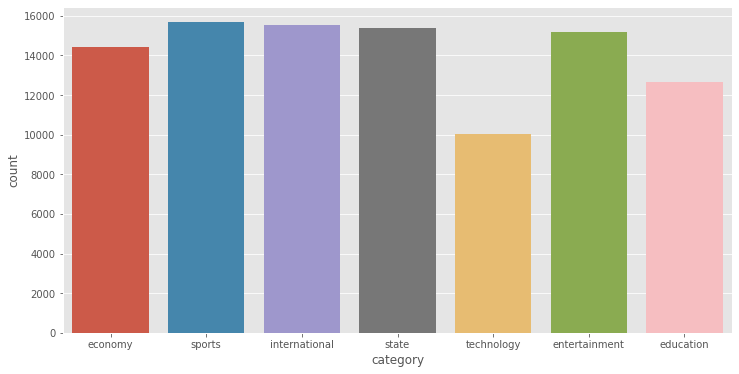

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='category',data=train)

# Exploratory Data Analysis

Analysis of character level,word level and sentence level analysis.

### Number of characters in text

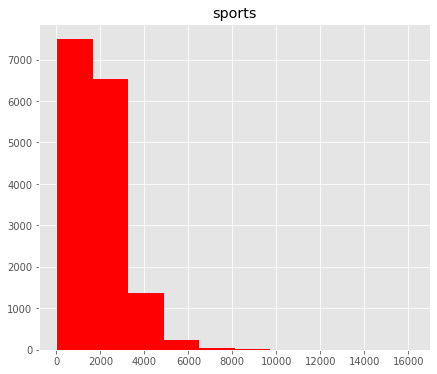

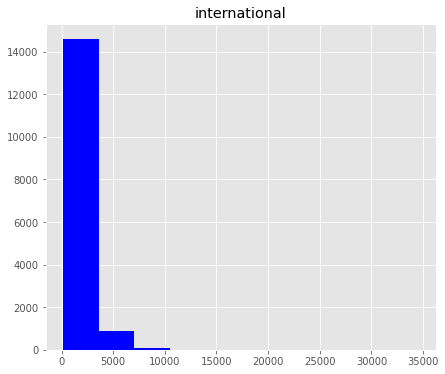

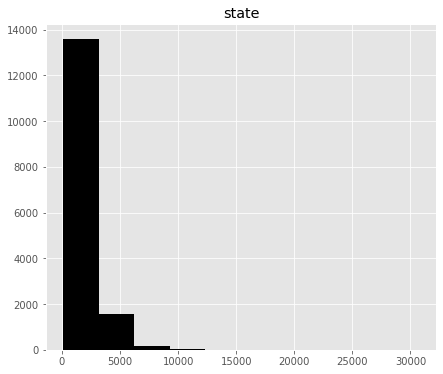

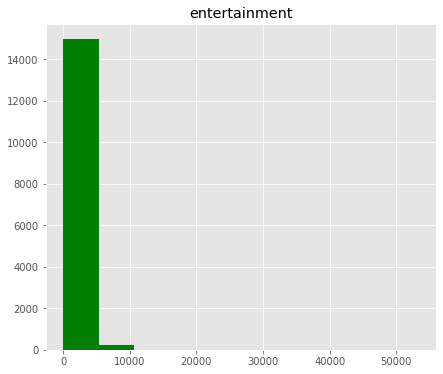

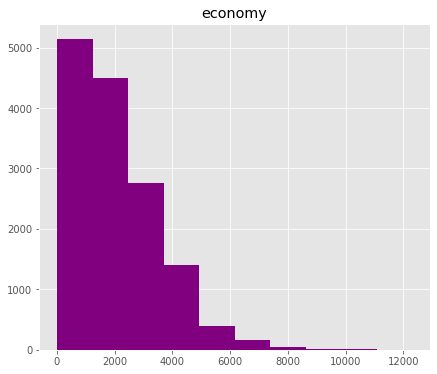

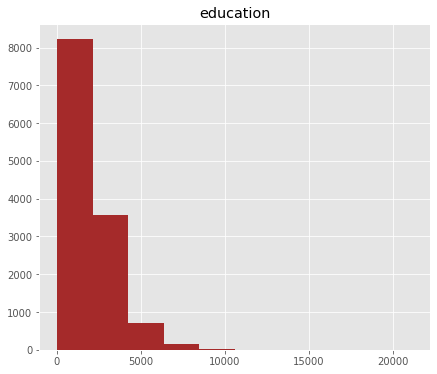

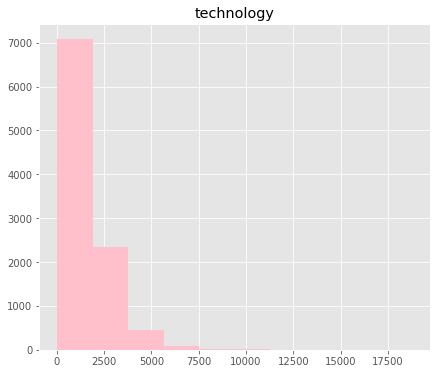

In [11]:
fig,(ax1)=plt.subplots(1, figsize=(7,6))
train_len=train[train['category']=='sports']['cleanText'].str.len()
ax1.hist(train_len,color='red')
ax1.set_title('sports')
plt.show()
fig,(ax1)=plt.subplots(1, figsize=(7,6))
train_len=train[train['category']=='international']['cleanText'].str.len()
ax1.hist(train_len,color='blue')
ax1.set_title('international')
plt.show()
fig,(ax1)=plt.subplots(1, figsize=(7,6))
train_len=train[train['category']=='state']['cleanText'].str.len()
ax1.hist(train_len,color='black')
ax1.set_title('state')
plt.show()
fig,(ax1)=plt.subplots(1, figsize=(7,6))
train_len=train[train['category']=='entertainment']['cleanText'].str.len()
ax1.hist(train_len,color='green')
ax1.set_title('entertainment')
plt.show()
fig,(ax1)=plt.subplots(1, figsize=(7,6))
train_len=train[train['category']=='economy']['cleanText'].str.len()
ax1.hist(train_len,color='purple')
ax1.set_title('economy')
plt.show()
fig,(ax1)=plt.subplots(1, figsize=(7,6))
train_len=train[train['category']=='education']['cleanText'].str.len()
ax1.hist(train_len,color='brown')
ax1.set_title('education')
plt.show()
fig,(ax1)=plt.subplots(1, figsize=(7,6))
train_len=train[train['category']=='technology']['cleanText'].str.len()
ax1.hist(train_len,color='pink')
ax1.set_title('technology')
plt.show()


### Number of words in a text

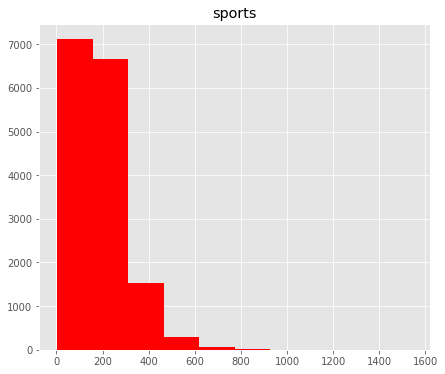

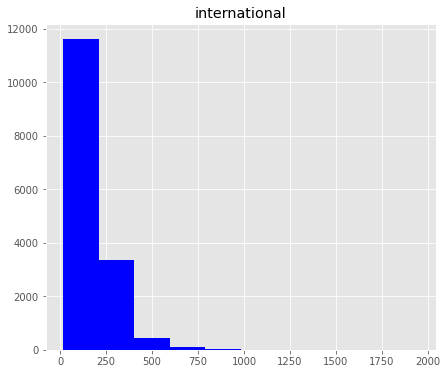

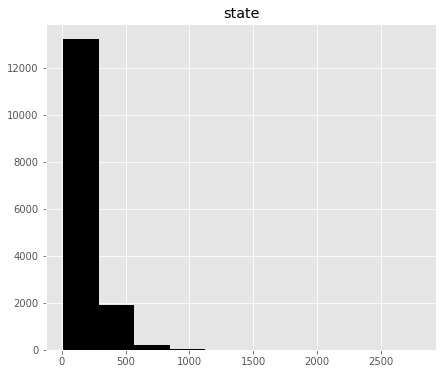

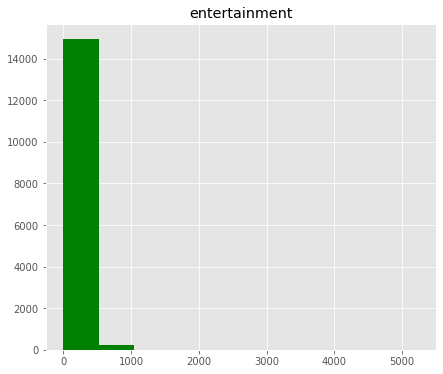

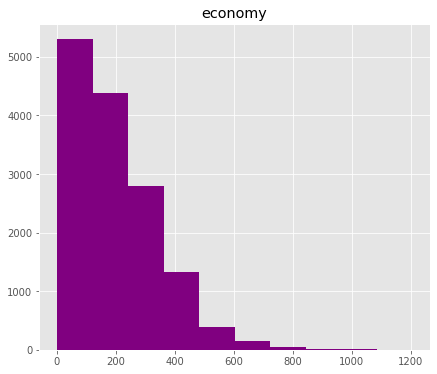

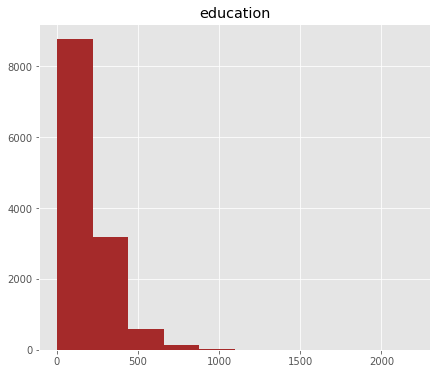

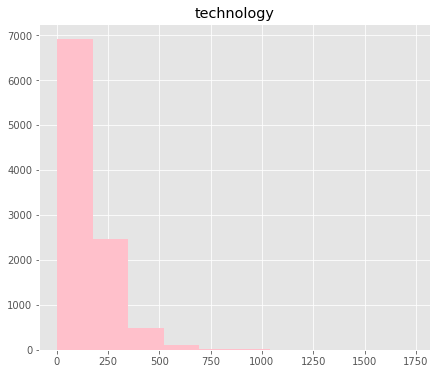

In [12]:
fig,(ax1)=plt.subplots(1,figsize=(7,6))
train_len=train[train['category']=='sports']['cleanText'].str.split().map(lambda x: len(x))
ax1.hist(train_len,color='red')
ax1.set_title('sports')
plt.show()
fig,(ax1)=plt.subplots(1,figsize=(7,6))
train_len=train[train['category']=='international']['cleanText'].str.split().map(lambda x: len(x))
ax1.hist(train_len,color='blue')
ax1.set_title('international')
plt.show()
fig,(ax1)=plt.subplots(1,figsize=(7,6))
train_len=train[train['category']=='state']['cleanText'].str.split().map(lambda x: len(x))
ax1.hist(train_len,color='black')
ax1.set_title('state')
plt.show()
fig,(ax1)=plt.subplots(1,figsize=(7,6))
train_len=train[train['category']=='entertainment']['cleanText'].str.split().map(lambda x: len(x))
ax1.hist(train_len,color='green')
ax1.set_title('entertainment')
plt.show()
fig,(ax1)=plt.subplots(1,figsize=(7,6))
train_len=train[train['category']=='economy']['cleanText'].str.split().map(lambda x: len(x))
ax1.hist(train_len,color='purple')
ax1.set_title('economy')
plt.show()
fig,(ax1)=plt.subplots(1,figsize=(7,6))
train_len=train[train['category']=='education']['cleanText'].str.split().map(lambda x: len(x))
ax1.hist(train_len,color='brown')
ax1.set_title('education')
plt.show()
fig,(ax1)=plt.subplots(1,figsize=(7,6))
train_len=train[train['category']=='technology']['cleanText'].str.split().map(lambda x: len(x))
ax1.hist(train_len,color='pink')
ax1.set_title('technology')
plt.show()

###  Average word length in a text

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

Text(0.5, 0.98, 'Average word length')

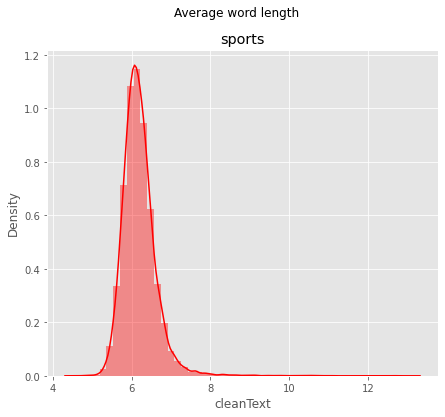

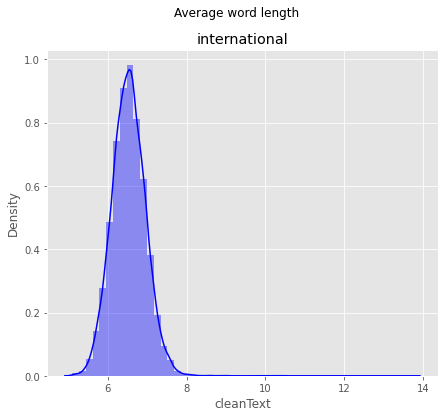

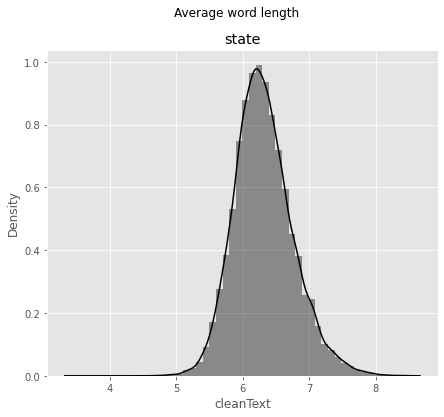

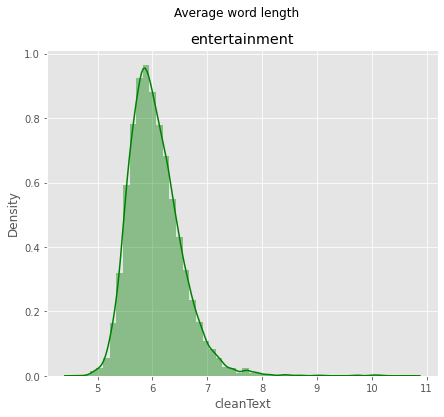

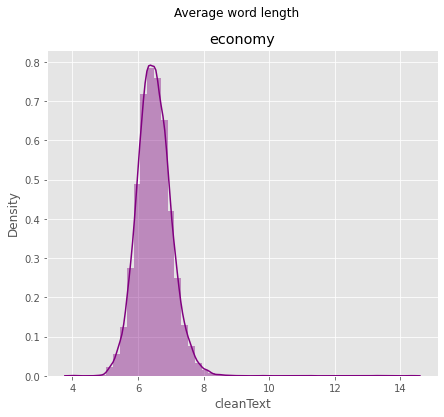

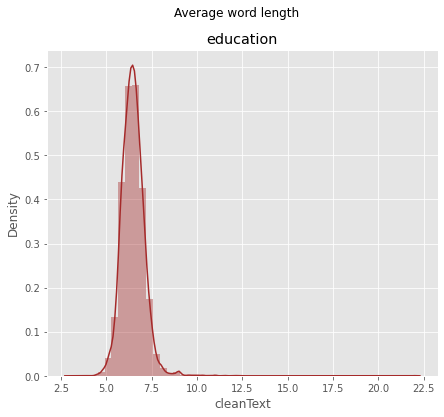

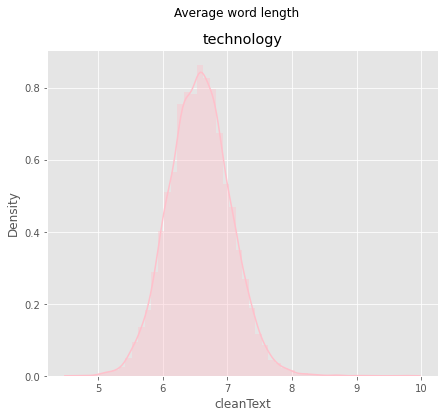

In [13]:
fig,(ax1)=plt.subplots(1,figsize=(7,6))
word=train[train['category']=='sports']['cleanText'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('sports')
fig.suptitle('Average word length')
fig,(ax1)=plt.subplots(1,figsize=(7,6))
word=train[train['category']=='international']['cleanText'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('international')
fig.suptitle('Average word length')
fig,(ax1)=plt.subplots(1,figsize=(7,6))
word=train[train['category']=='state']['cleanText'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='black')
ax1.set_title('state')
fig.suptitle('Average word length')
fig,(ax1)=plt.subplots(1,figsize=(7,6))
word=train[train['category']=='entertainment']['cleanText'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('entertainment')
fig.suptitle('Average word length')
fig,(ax1)=plt.subplots(1,figsize=(7,6))
word=train[train['category']=='economy']['cleanText'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='purple')
ax1.set_title('economy')
fig.suptitle('Average word length')
fig,(ax1)=plt.subplots(1,figsize=(7,6))
word=train[train['category']=='education']['cleanText'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='brown')
ax1.set_title('education')
fig.suptitle('Average word length')
fig,(ax1)=plt.subplots(1,figsize=(7,6))
word=train[train['category']=='technology']['cleanText'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='pink')
ax1.set_title('technology')
fig.suptitle('Average word length')


## Checking Common stopwords of each categories 

### Analyze stop words from text column of sports category (top 20)

In [14]:
#install bnlp_toolkit
!pip install bnlp_toolkit

     |████████████████████████████████| 1.2 MB 5.2 MB/s 
     |████████████████████████████████| 23.9 MB 63.5 MB/s 
     |████████████████████████████████| 743 kB 57.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [15]:
from bnlp.corpus import stopwords

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
def create_corpus_with_Text(category):
    corpus=[]
    
    for x in train[train['category']==category]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus



In [17]:
corpus=create_corpus_with_Text('sports')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [18]:
x,y=zip(*top)
px.bar(x = x, y = y , labels={"x":"top 20 most common stop words","y":"count"} , title='Sports Category top 20 Most Common Stop Words')

### Analyze stop words from cleanText column of sports category (top 20)

In [19]:
def create_corpus_with_Clean_Text(category):
    corpus=[]
    
    for x in train[train['category']==category]['cleanText'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [20]:
corpus=create_corpus_with_Clean_Text('sports')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [21]:
x,y=zip(*top)
px.bar(x = x, y = y , labels={"x":"top 20 most common stop words","y":"count"} , title='Sports Category top 20 Most Common Stop Words')

### Found that cleanText column of Sports category much less stop words contains compare with text column. So check others category for punctions on cleanText feature.

In [22]:
corpus=create_corpus_with_Clean_Text('international')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [23]:
x,y=zip(*top)
px.bar(x = x, y = y , labels={"x":"top 20 most common stop words","y":"count"} , title='international Category top 20 Most Common Stop Words')

In [24]:
corpus=create_corpus_with_Clean_Text('state')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [25]:
x,y=zip(*top)
px.bar(x = x, y = y , labels={"x":"top 20 most common stop words","y":"count"} , title='state Category top 20 Most Common Stop Words')

In [26]:
corpus=create_corpus_with_Clean_Text('entertainment')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [27]:
x,y=zip(*top)
px.bar(x = x, y = y , labels={"x":"top 20 most common stop words","y":"count"} , title='entertainment Category top 20  Most Common Stop Words')

In [28]:
corpus=create_corpus_with_Clean_Text('economy')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [29]:
x,y=zip(*top)
px.bar(x = x, y = y , labels={"x":"top 20 most common stop words","y":"count"} , title='economy Category top 20 Most Common Stop Words')

In [30]:
corpus=create_corpus_with_Clean_Text('education')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [31]:
x,y=zip(*top)
px.bar(x = x, y = y , labels={"x":"top 20 most common stop words","y":"count"} , title='education Category top 20 Most Common Stop Words')

In [32]:
corpus=create_corpus_with_Clean_Text('technology')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [33]:
x,y=zip(*top)
px.bar(x = x, y = y , labels={"x":"top 20 most common stop words","y":"count"} , title='technology Category top 20 Most Common Stop Words')

## Analyzing punctuations.

### Analyze punctuations text column of sports category

In [34]:
from bnlp.corpus import punctuations

plt.figure(figsize=(10,5))
corpus=create_corpus_with_Text('sports')

dic=defaultdict(int)
# import string
special = punctuations

# print(special)
for i in (corpus):
#     print(i)
    if i in special:
        dic[i]+=1
#         print(i)

# print(dic)        

x,y=zip(*dic.items())
px.bar(x=x,y=y, labels={"x":"Punctuations","y":"count"} , title='Punctuations count in Raw Text of Sports Category')

<Figure size 720x360 with 0 Axes>

### Analyze punctuations cleanText of sports category

In [35]:
from bnlp.corpus import punctuations

plt.figure(figsize=(10,5))
corpus=create_corpus_with_Clean_Text('sports')

dic=defaultdict(int)
special = punctuations


for i in (corpus):
    if i in special:
        dic[i]+=1

        
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"Punctuations","y":"count"} , title='Punctuations count in Clean Text of Sports Category')

except:
    print("No Punction Find" , dic.items())        

No Punction Find dict_items([])


<Figure size 720x360 with 0 Axes>

### Found that cleanText feature already not contains punctions. So check others categories for punctions on cleanText column.

In [36]:
from bnlp.corpus import punctuations

plt.figure(figsize=(10,5))
corpus=create_corpus_with_Clean_Text('international')

dic=defaultdict(int)
special = punctuations


for i in (corpus):
    if i in special:
        dic[i]+=1

        
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"Punctuations","y":"count"} , title='Punctuations count in Clean Text of international Category')

except:
    print("No Punction Find" , dic.items()) 

No Punction Find dict_items([])


<Figure size 720x360 with 0 Axes>

In [37]:
from bnlp.corpus import punctuations

plt.figure(figsize=(10,5))
corpus=create_corpus_with_Clean_Text('state')

dic=defaultdict(int)
special = punctuations


for i in (corpus):
    if i in special:
        dic[i]+=1

        
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"Punctuations","y":"count"} , title='Punctuations count in Clean Text of state Category')

except:
    print("No Punction Find" , dic.items()) 

No Punction Find dict_items([])


<Figure size 720x360 with 0 Axes>

In [38]:
from bnlp.corpus import punctuations

plt.figure(figsize=(10,5))
corpus=create_corpus_with_Clean_Text('entertainment')

dic=defaultdict(int)
special = punctuations


for i in (corpus):
    if i in special:
        dic[i]+=1

        
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"Punctuations","y":"count"} , title='Punctuations count in Clean Text of entertainment Category')

except:
    print("No Punction Find" , dic.items()) 

No Punction Find dict_items([])


<Figure size 720x360 with 0 Axes>

In [39]:
from bnlp.corpus import punctuations

plt.figure(figsize=(10,5))
corpus=create_corpus_with_Clean_Text('economy')

dic=defaultdict(int)
special = punctuations


for i in (corpus):
    if i in special:
        dic[i]+=1

        
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"Punctuations","y":"count"} , title='Punctuations count in Clean Text of economy Category')

except:
    print("No Punction Find" , dic.items()) 

No Punction Find dict_items([])


<Figure size 720x360 with 0 Axes>

In [40]:
from bnlp.corpus import punctuations

plt.figure(figsize=(10,5))
corpus=create_corpus_with_Clean_Text('education')

dic=defaultdict(int)
special = punctuations


for i in (corpus):
    if i in special:
        dic[i]+=1

        
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"Punctuations","y":"count"} , title='Punctuations count in Clean Text of education Category')

except:
    print("No Punction Find" , dic.items()) 

No Punction Find dict_items([])


<Figure size 720x360 with 0 Axes>

In [41]:
from bnlp.corpus import punctuations

plt.figure(figsize=(10,5))
corpus=create_corpus_with_Clean_Text('technology')

dic=defaultdict(int)
special = punctuations


for i in (corpus):
    if i in special:
        dic[i]+=1

        
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"Punctuations","y":"count"} , title='Punctuations count in Clean Text of technology Category')

except:
    print("No Punction Find" , dic.items()) 

No Punction Find dict_items([])


<Figure size 720x360 with 0 Axes>

## For all categories no punction found in cleanText column.

## Common words ?

In [42]:

corpus=create_corpus_with_Clean_Text('sports')
counter=Counter(corpus)

most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stopwords) :
        x.append(word)
        y.append(count)
px.bar(x=x,y=y , labels={"x":"words","y":"count"} , title='Common words of sports Category')

In [43]:

corpus=create_corpus_with_Clean_Text('international')
counter=Counter(corpus)

most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stopwords) :
        x.append(word)
        y.append(count)
px.bar(x=x,y=y , labels={"x":"words","y":"count"} , title='Common words of international Category')

In [44]:

corpus=create_corpus_with_Clean_Text('state')
counter=Counter(corpus)

most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stopwords) :
        x.append(word)
        y.append(count)
px.bar(x=x,y=y , labels={"x":"words","y":"count"} , title='Common words of state Category')

In [45]:

corpus=create_corpus_with_Clean_Text('entertainment')
counter=Counter(corpus)

most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stopwords) :
        x.append(word)
        y.append(count)
px.bar(x=x,y=y , labels={"x":"words","y":"count"} , title='Common words of entertainment Category')

In [46]:

corpus=create_corpus_with_Clean_Text('economy')
counter=Counter(corpus)

most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stopwords) :
        x.append(word)
        y.append(count)
px.bar(x=x,y=y, labels={"x":"words","y":"count"} , title='Common words of economy Category')

In [47]:

corpus=create_corpus_with_Clean_Text('education')
counter=Counter(corpus)

most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stopwords) :
        x.append(word)
        y.append(count)
px.bar(x=x,y=y , labels={"x":"words","y":"count"} , title='Common words of education Category')

In [48]:

corpus=create_corpus_with_Clean_Text('technology')
counter=Counter(corpus)

most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stopwords) :
        x.append(word)
        y.append(count)
px.bar(x=x,y=y , labels={"x":"words","y":"count"} , title='Common words of technology Category')

In [49]:
# assert False

## Ngram analysis

we will do a bigram (n=2) analysis over the text.Let's check the most common bigrams in text.

In [50]:
def get_top_train_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [51]:
top_train_bigrams=get_top_train_bigrams(train['cleanText'])[:10]
x,y=map(list,zip(*top_train_bigrams))
px.bar(x=x , y=y , labels={"x":"bigram","y":"count"} , title='bigram analysis')

# Data Cleaning

## Remove Stop words from cleanText column

In [52]:
fulldata = pd.concat([test, train])

In [53]:
fulldata.head()

,category,text,cleanText
0,education,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যো...
1,sports,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির ...
2,international,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল ...
3,international,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের (ইউসিট...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যা...
4,technology,সহজে ডিজিটাল আর্থিক সেবা দিতে অ্যাপ ও ডিজিটাল ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ...


In [54]:
from bnlp.corpus.util import remove_stopwords
st = []
for idx,_ in enumerate(fulldata["cleanText"]):
  tmp = remove_stopwords(_ , stopwords)
  tmp = ' '.join(tmp)
  st.append(tmp) 
  # print(_)

In [55]:
fulldata["new_clean_text"] = st

In [56]:
fulldata.head()

,category,text,cleanText,new_clean_text
0,education,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যো...,অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যোগাযোগ প্রযুক্ত...
1,sports,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির ...,স্পিন স্পিন স্পিন লর্ডসে ইয়াসির শাহ্ লেগ স্পিন...
2,international,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল ...,সিরিয়ার পশ্চিমাঞ্চলে গতকাল রোববার বিমান হামলা...
3,international,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের (ইউসিট...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যা...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের ইউসিটি...
4,technology,সহজে ডিজিটাল আর্থিক সেবা দিতে অ্যাপ ও ডিজিটাল ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ডিজিটাল কেওয়াইস...


## Checking stop words in each categories after removing from cleanText column

In [57]:
def create_corpus_new_clean_text(category):
    corpus=[]
    
    for x in fulldata[fulldata['category']==category]['new_clean_text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus



In [58]:
corpus=create_corpus_new_clean_text('sports')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [59]:
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"stop words","y":"count"} , title='stop words count after remove of Sports Category')

except:
    print("No Stop Word Find For Sports Category, " , dic.items()) 

No Stop Word Find For Sports Category,  dict_items([])


In [60]:
corpus=create_corpus_new_clean_text('international')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [61]:
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"stop words","y":"count"} , title='stop words count after remove of international Category')

except:
    print("No Stop Word Find For international Category, " , dic.items()) 

No Stop Word Find For international Category,  dict_items([])


In [62]:
corpus=create_corpus_new_clean_text('state')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [63]:
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"stop words","y":"count"} , title='stop words count after remove of state Category')

except:
    print("No Stop Word Find For state Category, " , dic.items()) 

No Stop Word Find For state Category,  dict_items([])


In [64]:
corpus=create_corpus_new_clean_text('entertainment')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [65]:
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"stop words","y":"count"} , title='stop words count after remove of entertainment Category')

except:
    print("No Stop Word Find For entertainment Category, " , dic.items()) 

No Stop Word Find For entertainment Category,  dict_items([])


In [66]:
corpus=create_corpus_new_clean_text('economy')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [67]:
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"stop words","y":"count"} , title='stop words count after remove of economy Category')

except:
    print("No Stop Word Find For economy Category, " , dic.items()) 

No Stop Word Find For economy Category,  dict_items([])


In [68]:
corpus=create_corpus_new_clean_text('education')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [69]:
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"stop words","y":"count"} , title='stop words count after remove of education Category')

except:
    print("No Stop Word Find For education Category, " , dic.items()) 

No Stop Word Find For education Category,  dict_items([])


In [70]:
corpus=create_corpus_new_clean_text('technology')

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 

In [71]:
try:
    x,y=zip(*dic.items())
    px.bar(x=x,y=y , labels={"x":"stop words","y":"count"} , title='stop words count after remove of technology Category')

except:
    print("No Stop Word Find For technology Category, " , dic.items()) 

No Stop Word Find For technology Category,  dict_items([])


In [76]:
"""
  Sound For Track after completed cells run
  
"""

# from IPython.lib.display import Audio
# import numpy as np

# framerate = 4410
# play_time_seconds = 50

# t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
# audio_data = np.sin(2*np.pi*600*t) + np.sin(2*np.pi*240*t)
# Audio(audio_data, rate=framerate, autoplay=True)

'\n  Sound For Track after completed cells run\n  \n'

## Save after remove clean text for training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
fulldata.to_csv('/content/drive/MyDrive/Bangla Text Classi Dataset/fulldata.csv')